# Assignment 2(due on 11/08)

## Student:李普双（12332294），Gtihub：LPS668899
## 批改人：张鹏


## 得分：48/50

### 1 Significant earthquakes since 2150 B.C.

In [9]:
import pandas as pd

#PS2_1
# 读取tsv文件
data = pd.read_csv('Sig_Eqs.tsv', delimiter='\t')

# 选择自公元前2150年以后的数据
data = data[data['Year'] >= -2150]

#PS2_1.1
# 根据国家对死亡人数进行分组和求和
deaths_by_country = data.groupby('Country')['Total Deaths'].sum()

# 按死亡总数降序排序
deaths_by_country = deaths_by_country.sort_values(ascending=False)

# 输出前十个国家及其死亡总数
top_10_countries = deaths_by_country.head(10)

print("Top Ten Countries by Total Deaths Since 2150 B.C.:")
print(top_10_countries)

Top Ten Countries by Total Deaths Since 2150 B.C.:
Country
CHINA         2041929.0
TURKEY         995648.0
IRAN           758650.0
SYRIA          437700.0
ITALY          422679.0
JAPAN          356083.0
HAITI          323776.0
AZERBAIJAN     310119.0
INDONESIA      282819.0
ARMENIA        189000.0
Name: Total Deaths, dtype: float64


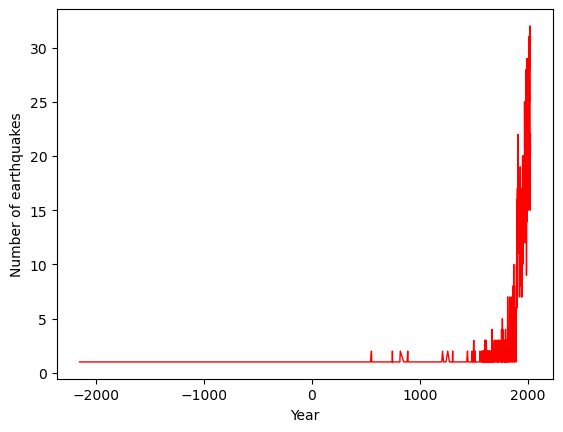

In [10]:
import matplotlib.pyplot as plt
# 选择地震震级大于6.0的数据
large_earthquakes = data[data['Mag'] > 6.0]
earthquakes_by_year = large_earthquakes.groupby(['Year'])['Country'].count()
earthquakes_by_year
plt.xlabel("Year")
plt.ylabel("Number of earthquakes")
plt.plot(earthquakes_by_year,color='red', linestyle='-',linewidth=1)
#PS2_1.2
# From the graph above, it is obvious that the number of earthquakes with magnitude larger than 6.0 gets higher rapidly in recent years.
# That may be because the data collection is gradually completed in recent years.

In [11]:
#PS2_1.3 Write the function CountEq_LargestEq
def CountEq_LargestEq(country):
    Sig_Eqs = pd.read_csv('Sig_Eqs.tsv', sep="\t")
    max_magnitude = Sig_Eqs['Mag'][Sig_Eqs['Country'] == country].max()
    largest_eq = Sig_Eqs[['Year','Mo','Dy']][(Sig_Eqs['Mag'] == max_magnitude) & (Sig_Eqs['Country'] == country)]
    
    total_eq_count = Sig_Eqs['Country'][Sig_Eqs['Country'] == country].count()
    
    return country, total_eq_count, largest_eq
CountEq_LargestEq('CHINA')
country_data = pd.read_csv('Sig_Eqs.tsv', sep="\t")
unique_countries = country_data['Country'].unique()

results = []

for country in unique_countries:
    results.append(CountEq_LargestEq(country))

results = sorted(results, key=lambda x: x[1], reverse=True)

result_df = pd.DataFrame(results, columns=['Country', 'Total Earthquakes', 'Largest Earthquake Info'])
result_df = result_df.sort_values(by='Total Earthquakes', ascending=False)

print(result_df[['Country', 'Total Earthquakes', 'Largest Earthquake Info']])

          Country  Total Earthquakes  \
0           CHINA                620   
1           JAPAN                414   
2       INDONESIA                411   
3            IRAN                384   
4          TURKEY                335   
..            ...                ...   
132       GRENADA                  1   
131        NORWAY                  1   
130  SIERRA LEONE                  1   
129       IRELAND                  1   
156           NaN                  0   

                               Largest Earthquake Info  
0               Year   Mo    Dy
982  1668.0  7.0  25.0  
1              Year   Mo    Dy
5742  2011.0  3.0  11.0  
2            Year    Mo    Dy
5340  2004.0  12.0  26.0  
3              Year    Mo    Dy
238  856.0  12.0  22.0  
4            Year    Mo    Dy
3412  1939.0  12.0  2...  
..                                                 ...  
132  Empty DataFrame
Columns: [Year, Mo, Dy]
Index: []  
131            Year   Mo    Dy
1569  1819.0  8.0  31.0  
130   

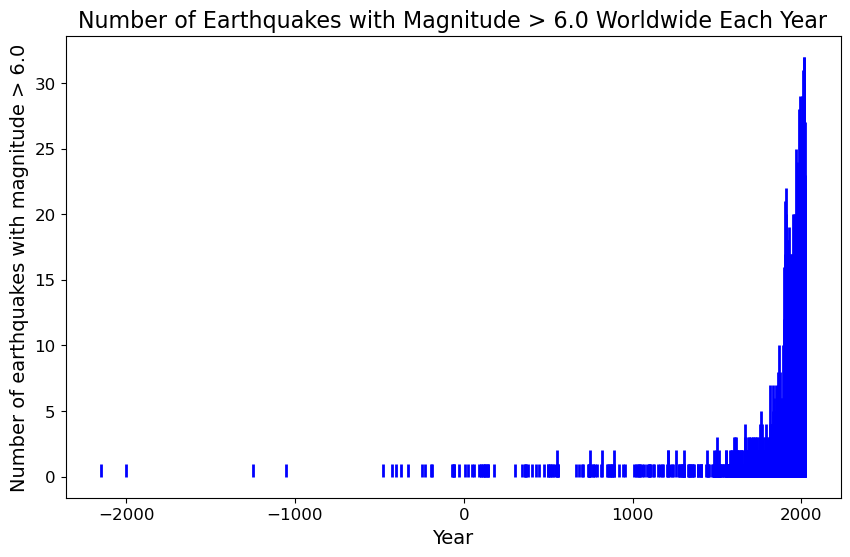

In [12]:
#1.2 助教添加
# 筛选出震级大于6.0的地震
large_quakes = data[data['Mag'] > 6.0]

# 按年份对数据进行分组，并得到每年的地震次数
quakes_by_year = large_quakes.groupby('Year')['Mag'].count()

plt.figure(figsize=(10, 6))
plt.vlines(quakes_by_year.index, ymin=0, ymax=quakes_by_year.values, color='blue', linewidth=2)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of earthquakes with magnitude > 6.0', fontsize=14)
plt.title('Number of Earthquakes with Magnitude > 6.0 Worldwide Each Year', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

# Displaying the plot
plt.show()

### 第一题代码运行正常，可以输出正确结果，报告中也展示了输出内容，也针对问题给出文字分析 。第二问绘图有一点点问题，建议绘制竖线图，见上面代码助教添加代码


### 得分：24/25
### --------------------------------------------------------------------------------------------

###  2. Wind speed in Shenzhen during the past 10 years

In [5]:
#PS2_2
df=pd.read_csv('2281305.csv')
df['WS'] = df['WND'].str.split(',', expand=True)[3]
df['YEAR'] = pd.to_datetime(df['DATE']).dt.year
df['MONTH'] = pd.to_datetime(df['DATE']).dt.month
df1=df[df['WS']!='9999']

df1['WS']=df1['WS'].astype(float)
df1.groupby(["YEAR","MONTH"]).mean()['WS'].plot()

/tmp/ipykernel_415523/1494314556.py:2: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('2281305.csv')
/tmp/ipykernel_415523/1494314556.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['WS']=df1['WS'].astype(float)


TypeError: Could not convert 2010-01-02T00:00:002010-01-02T01:00:002010-01-02T02:00:002010-01-02T03:00:002010-01-02T04:00:002010-01-02T05:00:002010-01-02T06:00:002010-01-02T07:00:002010-01-02T08:00:002010-01-02T09:00:002010-01-02T10:00:002010-01-02T11:00:002010-01-02T12:00:002010-01-02T13:00:002010-01-02T14:00:002010-01-02T15:00:002010-01-02T16:00:002010-01-02T17:00:002010-01-02T18:00:002010-01-02T19:00:002010-01-02T20:00:002010-01-02T21:00:002010-01-02T22:00:002010-01-02T23:00:002010-01-03T00:00:002010-01-03T01:00:002010-01-03T02:00:002010-01-03T03:00:002010-01-03T04:00:002010-01-03T05:00:002010-01-03T06:00:002010-01-03T07:00:002010-01-03T08:00:002010-01-03T09:00:002010-01-03T10:00:002010-01-03T11:00:002010-01-03T12:00:002010-01-03T13:00:002010-01-03T14:00:002010-01-03T15:00:002010-01-03T16:00:002010-01-03T17:00:002010-01-03T18:00:002010-01-03T19:00:002010-01-03T20:00:002010-01-03T21:00:002010-01-03T22:00:002010-01-03T23:00:002010-01-04T00:00:002010-01-04T01:00:002010-01-04T02:00:002010-01-04T03:00:002010-01-04T04:00:002010-01-04T05:00:002010-01-04T06:00:002010-01-04T07:00:002010-01-04T08:00:002010-01-04T09:00:002010-01-04T10:00:002010-01-04T11:00:002010-01-04T12:00:002010-01-04T13:00:002010-01-04T14:00:002010-01-04T15:00:002010-01-04T16:00:002010-01-04T17:00:002010-01-04T18:00:002010-01-04T19:00:002010-01-04T20:00:002010-01-04T21:00:002010-01-04T22:00:002010-01-04T23:00:002010-01-05T00:00:002010-01-05T01:00:002010-01-05T02:00:002010-01-05T03:00:002010-01-05T04:00:002010-01-05T05:00:002010-01-05T06:00:002010-01-05T07:00:002010-01-05T08:00:002010-01-05T09:00:002010-01-05T10:00:002010-01-05T11:00:002010-01-05T12:00:002010-01-05T13:00:002010-01-05T14:00:002010-01-05T15:00:002010-01-05T16:00:002010-01-05T17:00:002010-01-05T18:00:002010-01-05T19:00:002010-01-05T20:00:002010-01-05T21:00:002010-01-05T22:00:002010-01-05T23:00:002010-01-06T00:00:002010-01-06T01:00:002010-01-06T02:00:002010-01-06T03:00:002010-01-06T04:00:002010-01-06T05:00:002010-01-06T06:00:002010-01-06T07:00:002010-01-06T08:00:002010-01-06T09:00:002010-01-06T10:00:002010-01-06T11:00:002010-01-06T12:00:002010-01-06T13:00:002010-01-06T14:00:002010-01-06T15:00:002010-01-06T16:00:002010-01-06T17:00:002010-01-06T18:00:002010-01-06T19:00:002010-01-06T20:00:002010-01-06T21:00:002010-01-06T22:00:002010-01-06T23:00:002010-01-07T00:00:002010-01-07T01:00:002010-01-07T02:00:002010-01-07T03:00:002010-01-07T04:00:002010-01-07T05:00:002010-01-07T06:00:002010-01-07T07:00:002010-01-07T08:00:002010-01-07T09:00:002010-01-07T10:00:002010-01-07T11:00:002010-01-07T12:00:002010-01-07T13:00:002010-01-07T14:00:002010-01-07T15:00:002010-01-07T16:00:002010-01-07T17:00:002010-01-07T18:00:002010-01-07T19:00:002010-01-07T20:00:002010-01-07T21:00:002010-01-07T22:00:002010-01-07T23:00:002010-01-08T00:00:002010-01-08T01:00:002010-01-08T02:00:002010-01-08T03:00:002010-01-08T04:00:002010-01-08T05:00:002010-01-08T06:00:002010-01-08T07:00:002010-01-08T08:00:002010-01-08T09:00:002010-01-08T10:00:002010-01-08T11:00:002010-01-08T12:00:002010-01-08T13:00:002010-01-08T14:00:002010-01-08T15:00:002010-01-08T16:00:002010-01-08T17:00:002010-01-08T18:00:002010-01-08T19:00:002010-01-08T20:00:002010-01-08T21:00:002010-01-08T22:00:002010-01-08T23:00:002010-01-09T00:00:002010-01-09T01:00:002010-01-09T02:00:002010-01-09T03:00:002010-01-09T04:00:002010-01-09T05:00:002010-01-09T06:00:002010-01-09T07:00:002010-01-09T08:00:002010-01-09T09:00:002010-01-09T10:00:002010-01-09T11:00:002010-01-09T12:00:002010-01-09T13:00:002010-01-09T14:00:002010-01-09T15:00:002010-01-09T16:00:002010-01-09T17:00:002010-01-09T18:00:002010-01-09T19:00:002010-01-09T20:00:002010-01-09T21:00:002010-01-09T22:00:002010-01-09T23:00:002010-01-10T00:00:002010-01-10T01:00:002010-01-10T02:00:002010-01-10T03:00:002010-01-10T04:00:002010-01-10T05:00:002010-01-10T06:00:002010-01-10T07:00:002010-01-10T08:00:002010-01-10T09:00:002010-01-10T10:00:002010-01-10T11:00:002010-01-10T12:00:002010-01-10T13:00:002010-01-10T14:00:002010-01-10T15:00:002010-01-10T16:00:002010-01-10T17:00:002010-01-10T18:00:002010-01-10T19:00:002010-01-10T20:00:002010-01-10T21:00:002010-01-10T22:00:002010-01-10T23:00:002010-01-11T00:00:002010-01-11T01:00:002010-01-11T02:00:002010-01-11T03:00:002010-01-11T04:00:002010-01-11T05:00:002010-01-11T06:00:002010-01-11T07:00:002010-01-11T08:00:002010-01-11T09:00:002010-01-11T10:00:002010-01-11T11:00:002010-01-11T12:00:002010-01-11T13:00:002010-01-11T14:00:002010-01-11T15:00:002010-01-11T16:00:002010-01-11T17:00:002010-01-11T18:00:002010-01-11T19:00:002010-01-11T20:00:002010-01-11T21:00:002010-01-11T22:00:002010-01-11T23:00:002010-01-12T00:00:002010-01-12T01:00:002010-01-12T02:00:002010-01-12T03:00:002010-01-12T04:00:002010-01-12T05:00:002010-01-12T06:00:002010-01-12T07:00:002010-01-12T08:00:002010-01-12T09:00:002010-01-12T10:00:002010-01-12T11:00:002010-01-12T12:00:002010-01-12T13:00:002010-01-12T14:00:002010-01-12T15:00:002010-01-12T16:00:002010-01-12T17:00:002010-01-12T18:00:002010-01-12T19:00:002010-01-12T20:00:002010-01-12T21:00:002010-01-12T22:00:002010-01-12T23:00:002010-01-13T00:00:002010-01-13T01:00:002010-01-13T02:00:002010-01-13T03:00:002010-01-13T04:00:002010-01-13T05:00:002010-01-13T06:00:002010-01-13T07:00:002010-01-13T08:00:002010-01-13T09:00:002010-01-13T10:00:002010-01-13T11:00:002010-01-13T12:00:002010-01-13T13:00:002010-01-13T14:00:002010-01-13T15:00:002010-01-13T16:00:002010-01-13T17:00:002010-01-13T18:00:002010-01-13T19:00:002010-01-13T20:00:002010-01-13T21:00:002010-01-13T22:00:002010-01-13T23:00:002010-01-14T00:00:002010-01-14T01:00:002010-01-14T02:00:002010-01-14T03:00:002010-01-14T04:00:002010-01-14T05:00:002010-01-14T06:00:002010-01-14T07:00:002010-01-14T08:00:002010-01-14T09:00:002010-01-14T10:00:002010-01-14T11:00:002010-01-14T12:00:002010-01-14T13:00:002010-01-14T14:00:002010-01-14T15:00:002010-01-14T16:00:002010-01-14T17:00:002010-01-14T18:00:002010-01-14T19:00:002010-01-14T21:00:002010-01-14T23:00:002010-01-15T00:00:002010-01-15T01:00:002010-01-15T02:00:002010-01-15T03:00:002010-01-15T04:00:002010-01-15T05:00:002010-01-15T06:00:002010-01-15T07:00:002010-01-15T08:00:002010-01-15T09:00:002010-01-15T10:00:002010-01-15T11:00:002010-01-15T12:00:002010-01-15T13:00:002010-01-15T14:00:002010-01-15T15:00:002010-01-15T16:00:002010-01-15T17:00:002010-01-15T18:00:002010-01-15T19:00:002010-01-15T20:00:002010-01-15T21:00:002010-01-15T22:00:002010-01-15T23:00:002010-01-16T00:00:002010-01-16T01:00:002010-01-16T02:00:002010-01-16T03:00:002010-01-16T04:00:002010-01-16T05:00:002010-01-16T06:00:002010-01-16T07:00:002010-01-16T08:00:002010-01-16T09:00:002010-01-16T10:00:002010-01-16T11:00:002010-01-16T12:00:002010-01-16T13:00:002010-01-16T14:00:002010-01-16T15:00:002010-01-16T16:00:002010-01-16T17:00:002010-01-16T18:00:002010-01-16T19:00:002010-01-16T20:00:002010-01-16T21:00:002010-01-16T22:00:002010-01-16T23:00:002010-01-17T00:00:002010-01-17T01:00:002010-01-17T02:00:002010-01-17T03:00:002010-01-17T04:00:002010-01-17T05:00:002010-01-17T06:00:002010-01-17T07:00:002010-01-17T08:00:002010-01-17T09:00:002010-01-17T10:00:002010-01-17T11:00:002010-01-17T12:00:002010-01-17T13:00:002010-01-17T14:00:002010-01-17T15:00:002010-01-17T16:00:002010-01-17T17:00:002010-01-17T18:00:002010-01-17T19:00:002010-01-17T20:00:002010-01-17T21:00:002010-01-17T22:00:002010-01-17T23:00:002010-01-18T00:00:002010-01-18T01:00:002010-01-18T02:00:002010-01-18T03:00:002010-01-18T04:00:002010-01-18T05:00:002010-01-18T06:00:002010-01-18T07:00:002010-01-18T08:00:002010-01-18T09:00:002010-01-18T10:00:002010-01-18T11:00:002010-01-18T12:00:002010-01-18T13:00:002010-01-18T14:00:002010-01-18T15:00:002010-01-18T16:00:002010-01-18T17:00:002010-01-18T18:00:002010-01-18T19:00:002010-01-18T20:00:002010-01-18T21:00:002010-01-18T22:00:002010-01-18T23:00:002010-01-19T00:00:002010-01-19T01:00:002010-01-19T02:00:002010-01-19T03:00:002010-01-19T04:00:002010-01-19T05:00:002010-01-19T06:00:002010-01-19T07:00:002010-01-19T08:00:002010-01-19T09:00:002010-01-19T10:00:002010-01-19T11:00:002010-01-19T12:00:002010-01-19T13:00:002010-01-19T14:00:002010-01-19T15:00:002010-01-19T16:00:002010-01-19T17:00:002010-01-19T18:00:002010-01-19T19:00:002010-01-19T20:00:002010-01-19T21:00:002010-01-19T22:00:002010-01-19T23:00:002010-01-20T00:00:002010-01-20T01:00:002010-01-20T02:00:002010-01-20T03:00:002010-01-20T04:00:002010-01-20T05:00:002010-01-20T06:00:002010-01-20T07:00:002010-01-20T08:00:002010-01-20T09:00:002010-01-20T10:00:002010-01-20T11:00:002010-01-20T12:00:002010-01-20T13:00:002010-01-20T14:00:002010-01-20T15:00:002010-01-20T16:00:002010-01-20T17:00:002010-01-20T18:00:002010-01-20T19:00:002010-01-20T20:00:002010-01-20T21:00:002010-01-20T22:00:002010-01-20T23:00:002010-01-21T00:00:002010-01-21T01:00:002010-01-21T02:00:002010-01-21T03:00:002010-01-21T04:00:002010-01-21T05:00:002010-01-21T06:00:002010-01-21T07:00:002010-01-21T08:00:002010-01-21T09:00:002010-01-21T10:00:002010-01-21T11:00:002010-01-21T12:00:002010-01-21T13:00:002010-01-21T14:00:002010-01-21T15:00:002010-01-21T16:00:002010-01-21T17:00:002010-01-21T18:00:002010-01-21T19:00:002010-01-21T20:00:002010-01-21T21:00:002010-01-21T22:00:002010-01-21T23:00:002010-01-22T00:00:002010-01-22T01:00:002010-01-22T02:00:002010-01-22T03:00:002010-01-22T04:00:002010-01-22T05:00:002010-01-22T06:00:002010-01-22T07:00:002010-01-22T08:00:002010-01-22T09:00:002010-01-22T10:00:002010-01-22T11:00:002010-01-22T12:00:002010-01-22T13:00:002010-01-22T14:00:002010-01-22T15:00:002010-01-22T16:00:002010-01-22T17:00:002010-01-22T18:00:002010-01-22T19:00:002010-01-22T20:00:002010-01-22T21:00:002010-01-22T22:00:002010-01-22T23:00:002010-01-23T00:00:002010-01-23T01:00:002010-01-23T02:00:002010-01-23T03:00:002010-01-23T04:00:002010-01-23T05:00:002010-01-23T06:00:002010-01-23T07:00:002010-01-23T08:00:002010-01-23T09:00:002010-01-23T10:00:002010-01-23T11:00:002010-01-23T12:00:002010-01-23T13:00:002010-01-23T14:00:002010-01-23T15:00:002010-01-23T16:00:002010-01-23T17:00:002010-01-23T18:00:002010-01-23T19:00:002010-01-23T20:00:002010-01-23T21:00:002010-01-23T22:00:002010-01-23T23:00:002010-01-24T00:00:002010-01-24T01:00:002010-01-24T02:00:002010-01-24T03:00:002010-01-24T04:00:002010-01-24T05:00:002010-01-24T06:00:002010-01-24T07:00:002010-01-24T08:00:002010-01-24T09:00:002010-01-24T10:00:002010-01-24T11:00:002010-01-24T12:00:002010-01-24T13:00:002010-01-24T14:00:002010-01-24T15:00:002010-01-24T16:00:002010-01-24T17:00:002010-01-24T18:00:002010-01-24T19:00:002010-01-24T20:00:002010-01-24T21:00:002010-01-24T22:00:002010-01-24T23:00:002010-01-25T00:00:002010-01-25T01:00:002010-01-25T02:00:002010-01-25T03:00:002010-01-25T04:00:002010-01-25T05:00:002010-01-25T06:00:002010-01-25T07:00:002010-01-25T08:00:002010-01-25T09:00:002010-01-25T10:00:002010-01-25T11:00:002010-01-25T12:00:002010-01-25T13:00:002010-01-25T14:00:002010-01-25T15:00:002010-01-25T16:00:002010-01-25T17:00:002010-01-25T18:00:002010-01-25T19:00:002010-01-25T20:00:002010-01-25T21:00:002010-01-25T22:00:002010-01-25T23:00:002010-01-26T00:00:002010-01-26T01:00:002010-01-26T02:00:002010-01-26T03:00:002010-01-26T04:00:002010-01-26T05:00:002010-01-26T06:00:002010-01-26T07:00:002010-01-26T08:00:002010-01-26T09:00:002010-01-26T10:00:002010-01-26T11:00:002010-01-26T12:00:002010-01-26T13:00:002010-01-26T14:00:002010-01-26T15:00:002010-01-26T16:00:002010-01-26T17:00:002010-01-26T18:00:002010-01-26T19:00:002010-01-26T20:00:002010-01-26T21:00:002010-01-26T22:00:002010-01-26T23:00:002010-01-27T00:00:002010-01-27T01:00:002010-01-27T02:00:002010-01-27T03:00:002010-01-27T04:00:002010-01-27T05:00:002010-01-27T06:00:002010-01-27T07:00:002010-01-27T08:00:002010-01-27T09:00:002010-01-27T10:00:002010-01-27T11:00:002010-01-27T12:00:002010-01-27T13:00:002010-01-27T14:00:002010-01-27T15:00:002010-01-27T16:00:002010-01-27T17:00:002010-01-27T18:00:002010-01-27T19:00:002010-01-27T20:00:002010-01-27T21:00:002010-01-27T22:00:002010-01-27T23:00:002010-01-28T00:00:002010-01-28T01:00:002010-01-28T02:00:002010-01-28T03:00:002010-01-28T04:00:002010-01-28T05:00:002010-01-28T06:00:002010-01-28T07:00:002010-01-28T08:00:002010-01-28T09:00:002010-01-28T10:00:002010-01-28T11:00:002010-01-28T12:00:002010-01-28T13:00:002010-01-28T14:00:002010-01-28T15:00:002010-01-28T16:00:002010-01-28T17:00:002010-01-28T18:00:002010-01-28T19:00:002010-01-28T20:00:002010-01-28T21:00:002010-01-28T22:00:002010-01-28T23:00:002010-01-29T00:00:002010-01-29T01:00:002010-01-29T02:00:002010-01-29T03:00:002010-01-29T04:00:002010-01-29T05:00:002010-01-29T06:00:002010-01-29T07:00:002010-01-29T08:00:002010-01-29T09:00:002010-01-29T10:00:002010-01-29T11:00:002010-01-29T12:00:002010-01-29T13:00:002010-01-29T14:00:002010-01-29T15:00:002010-01-29T16:00:002010-01-29T17:00:002010-01-29T18:00:002010-01-29T19:00:002010-01-29T20:00:002010-01-29T21:00:002010-01-29T22:00:002010-01-29T23:00:002010-01-30T00:00:002010-01-30T01:00:002010-01-30T02:00:002010-01-30T03:00:002010-01-30T04:00:002010-01-30T05:00:002010-01-30T06:00:002010-01-30T07:00:002010-01-30T08:00:002010-01-30T09:00:002010-01-30T10:00:002010-01-30T11:00:002010-01-30T12:00:002010-01-30T13:00:002010-01-30T14:00:002010-01-30T15:00:002010-01-30T16:00:002010-01-30T17:00:002010-01-30T18:00:002010-01-30T19:00:002010-01-30T20:00:002010-01-30T21:00:002010-01-30T22:00:002010-01-30T23:00:002010-01-31T00:00:002010-01-31T01:00:002010-01-31T02:00:002010-01-31T03:00:002010-01-31T04:00:002010-01-31T05:00:002010-01-31T06:00:002010-01-31T07:00:002010-01-31T08:00:002010-01-31T09:00:002010-01-31T10:00:002010-01-31T11:00:002010-01-31T12:00:002010-01-31T13:00:002010-01-31T14:00:002010-01-31T15:00:002010-01-31T16:00:002010-01-31T17:00:002010-01-31T18:00:002010-01-31T19:00:002010-01-31T20:00:002010-01-31T21:00:002010-01-31T22:00:002010-01-31T23:00:00 to numeric

### 第二题版本问题助教未跑通但报告代码运行正常，可以输出正确结果。报告中展现了代码和结果，有对总体趋势的描述。

### 得分10/10
### ---------------------------------------------------------------------------------------------

###  3. Explore a data set

       年   月    A1    A2    A3    A4    A5     D1    D2    D3  ...     W9  \
0   2018   8  7.43  7.99  7.63  8.39  8.47  15.18  8.17  6.13  ...  10.76   
1   2018   9  7.43  8.00  7.62  8.38  8.47  15.14  8.06  6.12  ...  10.72   
2   2018  10  7.44  8.01  7.62  8.36  8.46  15.13  7.94  6.10  ...  10.65   
3   2018  11  7.93  7.60  7.80  8.32  8.42  15.15  7.94  6.12  ...  10.66   
4   2018  12  8.84  8.44  8.51  8.38  8.48  15.15  7.93  6.13  ...  10.69   
5   2019   1  8.84  8.48  8.60  8.44  8.53  15.09  7.91  6.16  ...  10.72   
6   2019   2  8.51  8.26  8.49  8.40  8.53  15.04  7.89  6.19  ...  10.84   
7   2019   3  8.39  8.17  8.50  8.50  8.66  15.02  7.90  6.20  ...  10.92   
8   2019   4  8.30  8.06  8.37  8.36  8.52  15.11  7.97  6.14  ...  10.83   
9   2019   5  8.11  7.87  8.21  8.21  8.37  15.08  8.12  6.15  ...  10.76   
10  2019   6  8.29  7.92  8.12  8.05  8.19  15.05  8.27  6.17  ...  10.73   
11  2019   7  8.88  8.35  8.30  8.09  8.18  15.00  8.19  6.15  ...  10.74   

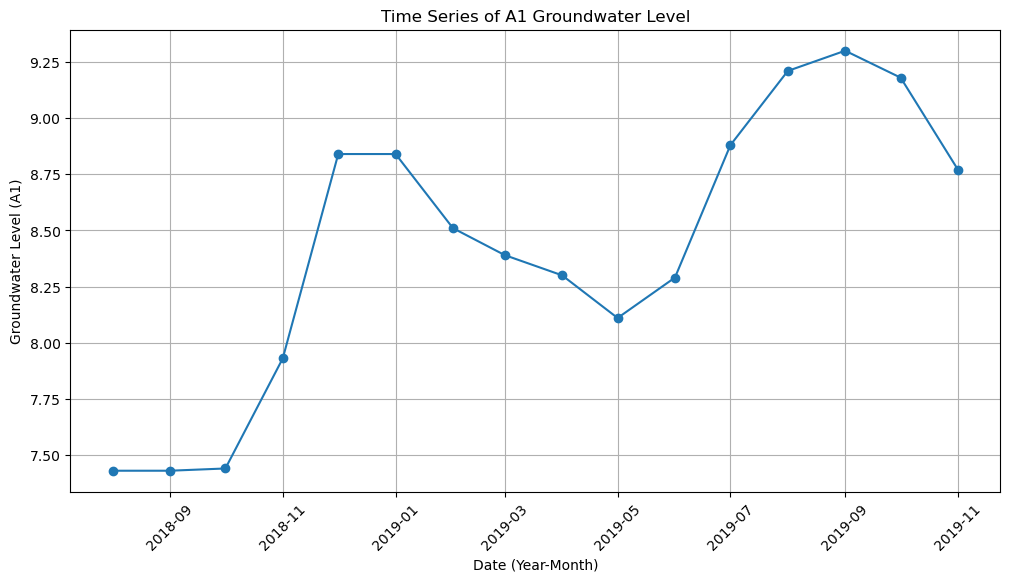

1. Maximum Value for A1: 9.3
2. Minimum Value for A1: 7.43
3. Mean Value for A1: 8.428125
4. Variance for A1: 0.3972695833333335

5. Box Plot for A1:


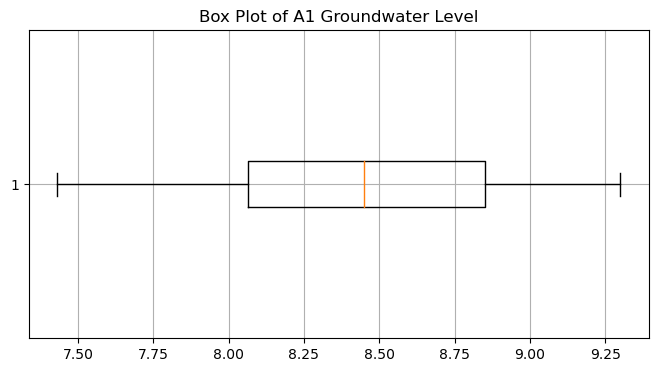

In [6]:
#PS2_3
# 3.1. 加载数据
file_path = '201808-201911Groundwater level monitoring data.xlsx'
sheet_name = '2018.8~2019.11地下水位数据'

# 读取Excel文件中的数据
data = pd.read_excel(file_path, sheet_name=sheet_name)
print(data)
# 3.2. 绘制A1变量的时间序列图
# 合并"年"和"月"列为日期列
data['Date'] = pd.to_datetime(data['年'].astype(str) + '-' + data['月'].astype(str), format='%Y-%m')

# 2. 绘制A1变量的时间序列图
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['A1'], marker='o', linestyle='-')
plt.title('Time Series of A1 Groundwater Level')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Groundwater Level (A1)')
plt.grid(True)
plt.xticks(rotation=45)  # 旋转x轴标签以显示年和月
plt.show()

#3.3 5个简单的统计检查并报告结果
# 3.3.1. 最大值
max_value = data['A1'].max()

# 3.3.2. 最小值
min_value = data['A1'].min()

# 3.3.3 平均值
mean_value = data['A1'].mean()

# 3.3.4. 方差
variance_value = data['A1'].var()

# 3.3.5. 箱型图
plt.figure(figsize=(8, 4))
plt.boxplot(data['A1'], vert=False)
plt.title('Box Plot of A1 Groundwater Level')
plt.grid(True)

# 打印统计结果
print("1. Maximum Value for A1:", max_value)
print("2. Minimum Value for A1:", min_value)
print("3. Mean Value for A1:", mean_value)
print("4. Variance for A1:", variance_value)
print("\n5. Box Plot for A1:")
plt.show()

### 第三题代码输出结果正确，也在报告中展现了输出结果但是没有呈现相应的分析 report your findings.
### 得分14/15
